In [1]:
try:
    import bliss
except:
    print("Failed to install bliss from installed module. Attempting build directory development module")
    import sys
    sys.path.append("../build/bliss/python")
    import bliss


Failed to install bliss from installed module. Attempting build directory development module


<frozen importlib._bootstrap>:219: RuntimeWarning: nanobind: type 'ndarray' was already registered!

<frozen importlib._bootstrap>:219: RuntimeWarning: nanobind: type 'dev' was already registered!



This reads the voyagers

In [2]:
data_loc = "/datag/public/voyager_2020/single_coarse_channel/"

cadence = bliss.cadence([[f"{data_loc}/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5"
                    ],
                    [f"{data_loc}/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5"]])


In [3]:
cadence.set_device("cuda:3")

In [4]:


cadence = bliss.flaggers.flag_filter_rolloff(cadence, .2)

cadence = bliss.flaggers.flag_spectral_kurtosis(cadence, .05, 25)



DEBUG: reading data from coarse channel 0 which translates to offset {0, 0, 0} + count {16, 1, 1048576}
DEBUG: reading data from coarse channel 0 which translates to offset {0, 0, 0} + count {16, 1, 1048576}
DEBUG: reading data from coarse channel 0 which translates to offset {0, 0, 0} + count {16, 1, 1048576}
DEBUG: reading data from coarse channel 0 which translates to offset {0, 0, 0} + count {16, 1, 1048576}
DEBUG: reading data from coarse channel 0 which translates to offset {0, 0, 0} + count {16, 1, 1048576}
DEBUG: reading data from coarse channel 0 which translates to offset {0, 0, 0} + count {16, 1, 1048576}


In [5]:

noise_est_options = bliss.estimators.noise_power_estimate_options()
noise_est_options.masked_estimate = True
noise_est_options.estimator_method = bliss.estimators.noise_power_estimator.stddev
cadence = bliss.estimators.estimate_noise_power(cadence, noise_est_options)


In [6]:
opts = bliss.integrate_drifts_options()
opts.desmear = True
opts.low_rate = -500
opts.high_rate = 500
opts.rate_step_size = 1

cadence = bliss.drift_search.integrate_drifts(cadence, opts)


In [7]:
hit_search_opts = bliss.drift_search.hit_search_options()
hit_search_opts.method = bliss.drift_search.hit_search_methods.connected_components
hit_search_opts.snr_threshold = 10.0

cadence_with_hits = bliss.drift_search.hit_search(cadence, hit_search_opts)


In [8]:

cadence_with_hits.set_device("cpu")


In [9]:

hits = bliss.plot_utils.get_hits_list(cadence_with_hits)


INFO: spec kurtosis with M=16 and N=51
INFO: spec kurtosis with M=16 and N=51
INFO: spec kurtosis with M=16 and N=51
INFO: spec kurtosis with M=16 and N=51
INFO: spec kurtosis with M=16 and N=51
INFO: spec kurtosis with M=16 and N=51


In [10]:

bliss.plot_utils.scatter_matrix_hits(hits)


/home/nwest/.conda/envs/bliss-dev/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.VConcatChart(...)

In [11]:

cc = cadence_with_hits.observations[0].scans[0].read_coarse_channel(0)


[<Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>]

/home/nwest/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  func(*args, **kwargs)
/home/nwest/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


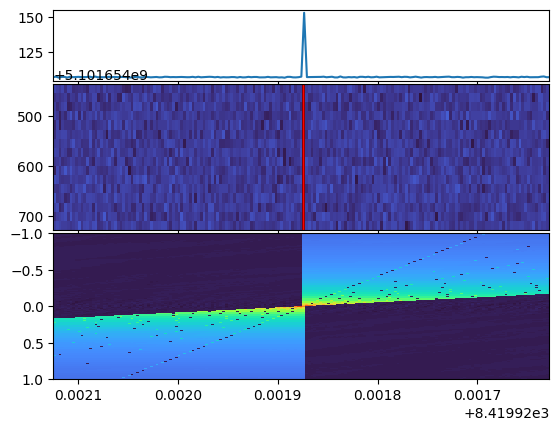

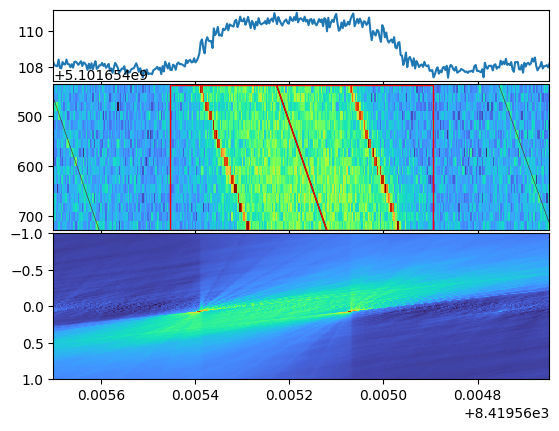

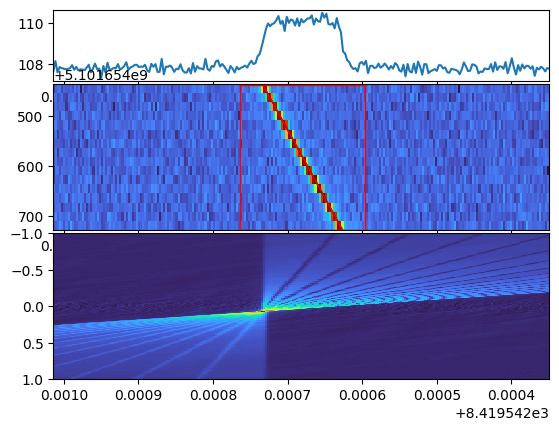

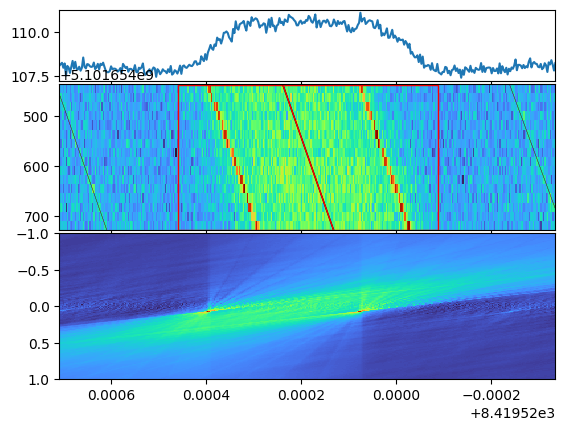

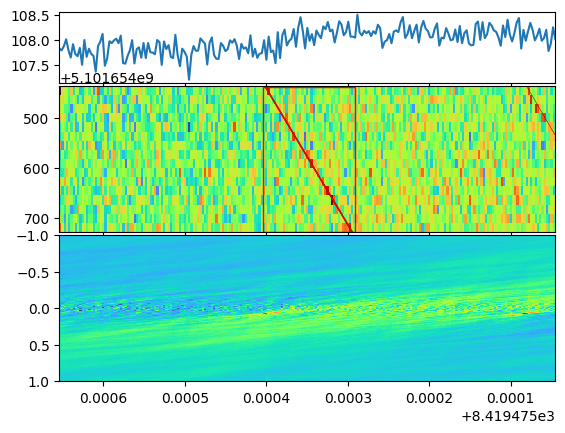

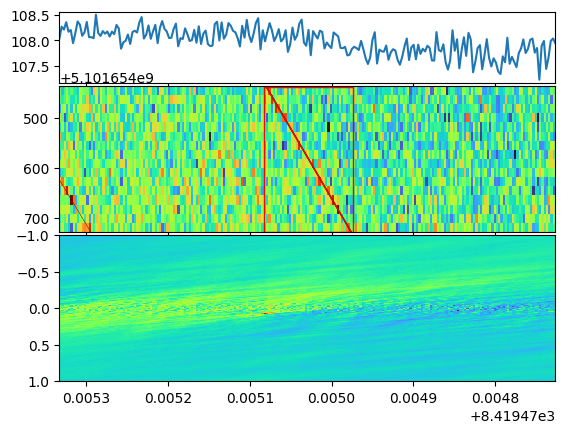

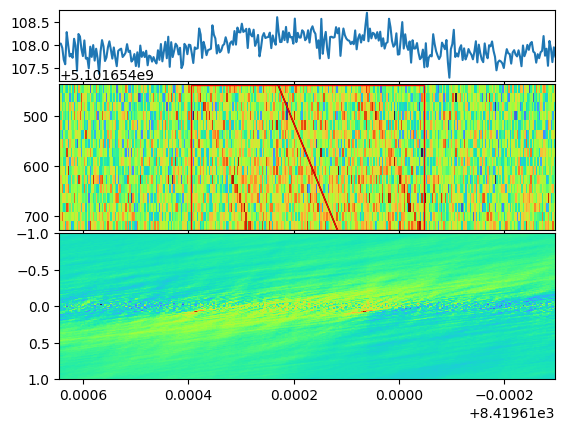

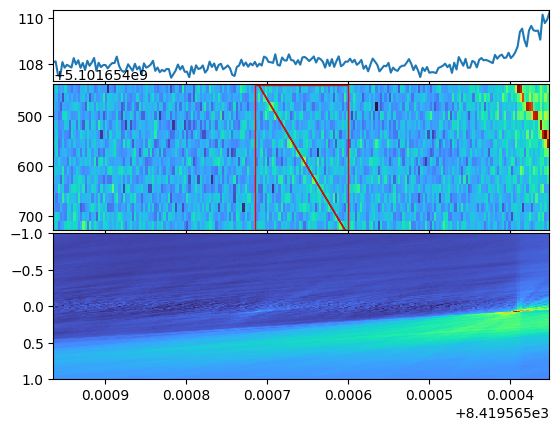

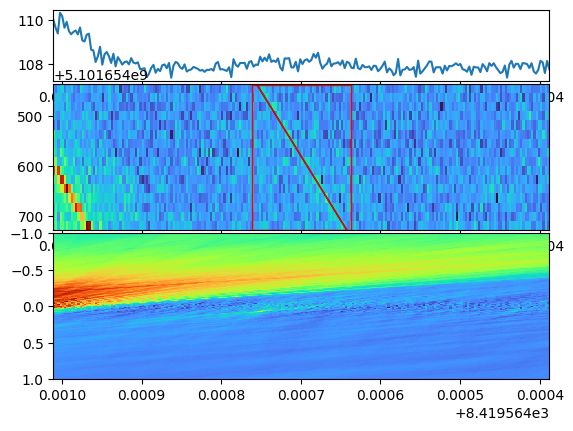

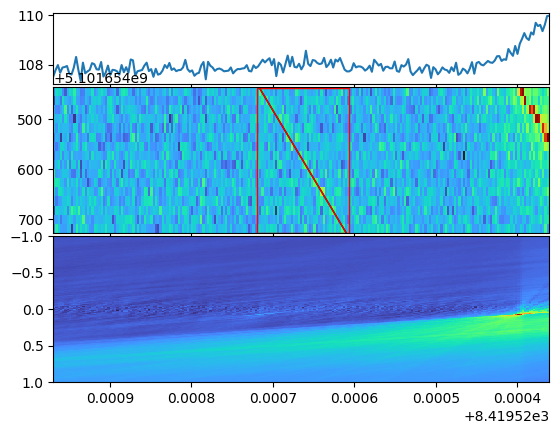

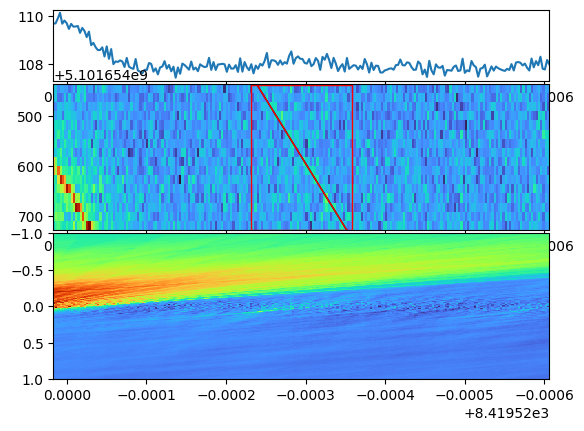

In [12]:
bliss.plot_utils.plot_hits(cc, focus_hits=cc.hits)
